In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier,StackingClassifier

In [155]:
airbnb = pd.read_csv('Data/Modelling_Dataframe.csv')

In [156]:
airbnb.head()

,host_is_superhost,comments,host_response_time,host_response_rate,review_scores_rating,reviews_per_month
0,0,Sylvia is a hostess who is gracious and helpfu...,within a few hours,100.0,4.83,3.72
1,1,Elizabeth was really nice and friendly. She he...,within a day,100.0,4.90,1.78
2,0,"Had a wonderful time at this awesome, spacious...",within a few hours,86.0,4.97,0.78
3,0,Amy and family were wonderful hosts! The house...,within an hour,100.0,4.97,2.12
4,1,"The place was nice, it was like a disco in the...",within a day,100.0,4.53,0.32


In [157]:
X = (airbnb.drop(columns = ['host_is_superhost']))
y = (airbnb['host_is_superhost'])

In [158]:
y.value_counts(normalize = True)

0    0.514055
1    0.485945
Name: host_is_superhost, dtype: float64

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=420)

In [184]:
X_1 = (airbnb.drop(columns = ['host_is_superhost']))
X_1 = pd.get_dummies(columns = ['host_response_time'], drop_first = True, data = X_1)
y = (airbnb['host_is_superhost'])

In [185]:
X_1train, X_1test, y_train, y_test = train_test_split(X_1,y,test_size=0.30,stratify=y,random_state=420)

In [186]:
pipe_log = Pipeline([
        ('cs', ColumnTransformer([
    ('text_vect', CountVectorizer(), 'comments')],
    remainder ='passthrough',
)),
        ('log', LogisticRegression())
    ])

pipe_log.fit(X_1train,y_train)
pipe_log.score(X_1train,y_train)

/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8267645736550278

In [187]:
pipe_log.score(X_1test,y_test)

0.7256204124432016

Pipeline that does count vectorizer on comments, and then does logistic regression. This model is over fit. The test score is higher than the baseline score.

In [200]:
pipe_knn = Pipeline([
        ('cs', ColumnTransformer([
    ('text_vect', CountVectorizer(), 'comments')],
    remainder ='passthrough',
)),
        ('knn', KNeighborsClassifier())
    ])

pipe_knn.fit(X_1train,y_train)
pipe_knn.score(X_1train,y_train)

0.7885508766671662

In [201]:
pipe_knn.score(X_1test,y_test)

0.6812303390422929

The model is overfit, but has a lower training and testing score than the Logistic pipeline.

In [192]:
pipe_dt = Pipeline([
        ('cs', ColumnTransformer([
    ('text_vect', CountVectorizer(), 'comments')],
    remainder ='passthrough',
)),
        ('dt', DecisionTreeClassifier())
    ])

pipe_dt.fit(X_1train,y_train)
pipe_dt.score(X_1train,y_train)

1.0

In [193]:
pipe_dt.score(X_1test,y_test)

0.6801817546312479

This model extremely overfit and has a low test score.

In [194]:
pipe_bag = Pipeline([
        ('cs', ColumnTransformer([
    ('text_vect', CountVectorizer(), 'comments')],
    remainder ='passthrough',
)),
        ('bag', BaggingClassifier())
    ])

pipe_bag.fit(X_1train,y_train)
pipe_bag.score(X_1train,y_train)

0.9826165143114042

In [195]:
pipe_bag.score(X_1test,y_test)

0.7256204124432016

This model is also extremely overfit, but has the same test score as logistic regression pipeline.

In [196]:
pipe_rf = Pipeline([
        ('cs', ColumnTransformer([
    ('text_vect', CountVectorizer(), 'comments')],
    remainder ='passthrough',
)),
        ('rf', RandomForestClassifier())
    ])

pipe_rf.fit(X_1train,y_train)
pipe_rf.score(X_1train,y_train)

1.0

In [197]:
pipe_rf.score(X_1test,y_test)

0.7154840964697659

This model is very overfit and has a testing score lower than the Logistic Regression pipeline model.

In [198]:
pipe_ada = Pipeline([
        ('cs', ColumnTransformer([
    ('text_vect', CountVectorizer(), 'comments')],
    remainder ='passthrough',
)),
        ('ada', AdaBoostClassifier())
    ])

pipe_ada.fit(X_1train,y_train)
pipe_ada.score(X_1train,y_train)

0.7507867525850442

In [199]:
pipe_ada.score(X_1test,y_test)

0.7343586158685774

This model has the highest testing score and is the least overfit.

In [217]:
level2_models = [
    ('log_pipe', Pipeline([
          ('cs', ColumnTransformer([
    ('text_vect', CountVectorizer(), 'comments')],
    remainder ='passthrough',
)),
    
        ('log', LogisticRegression())
    ])
]

stack1 = StackingClassifier(estimators=level2_models,
                         final_estimator=AdaBoostClassifier())


In [213]:
stack1.fit(X_1train,y_train)
stack1.score(X_1train, y_train)

/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

0.8197212647984414

In [214]:
stack1.score(X_1test, y_test)

0.7221251310730514

This stack model is overfit and has a lower test score than the basic adaboost classifier pipeline.

Will now try the logistic regression pipeline with params to see if it increases the test score.

In [ ]:
pipe_log1 = Pipeline([
        ('cs', ColumnTransformer([
    ('text_vect', CountVectorizer(), 'comments')],
    remainder ='passthrough',
)),
    ('ss', StandardScaler(), ['reviews_per','host_response_rate','review_scores_rating'])
        ('log', LogisticRegression())
    ])


In [262]:
params = {
    'log__max_iter' : [3_500,4_000]
}

In [263]:
gs = GridSearchCV(estimator = pipe_log1, param_grid = params, cv = 5)

In [264]:
gs.fit(X_1train,y_train)

/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cs',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('text_vect',
                                                                         CountVectorizer(),
                                                                         'comments')])),
                                       ('log', LogisticRegression())]),
             param_grid={'log__max_iter': [3500, 4000]})

In [265]:
gs.score(X_1train, y_train)

0.989809680803237

In [266]:
gs.score(X_1test,y_test)

0.7004543865781195

In [267]:
gs.best_score_

0.6873974248830642

In [268]:
gs.best_params_

{'log__max_iter': 4000}

Had a worse test score and is very overfit, will continue with Adaboost Model instead of Logistic Regression.

In [271]:
pipe_ada = Pipeline([
        ('cs', ColumnTransformer([
    ('text_vect', CountVectorizer(), 'comments')],
    remainder ='passthrough',
)),
        ('ada', AdaBoostClassifier())
    ])



In [280]:
params = {
    'cs__text_vect__max_features' : [450,500],
    'cs__text_vect__min_df' : [100,150],
    'cs__text_vect__max_df' : [.80,0.85]
}

In [281]:
gs = GridSearchCV(estimator = pipe_ada, param_grid = params, cv = 5)

In [282]:
gs.fit(X_1train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cs',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('text_vect',
                                                                         CountVectorizer(),
                                                                         'comments')])),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'cs__text_vect__max_df': [0.8, 0.85],
                         'cs__text_vect__max_features': [450, 500],
                         'cs__text_vect__min_df': [100, 150]})

In [283]:
gs.score(X_1train, y_train)

0.7567810579949048

In [284]:
gs.score(X_1test,y_test)

0.7357567284166375

In [285]:
gs.best_score_

0.7361011629016951

In [286]:
gs.best_params_

{'cs__text_vect__max_df': 0.85,
 'cs__text_vect__max_features': 500,
 'cs__text_vect__min_df': 100}

In [287]:
preds = gs.predict(X_1test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

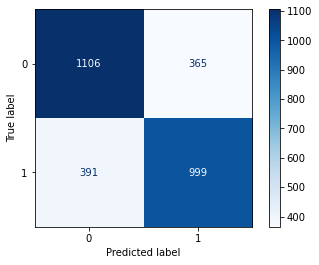

In [288]:
plot_confusion_matrix(gs, X_1test, y_test, cmap='Blues', values_format='d');

In [289]:
spec = tn / (tn + fp)
spec

0.751869476546567

The best model was adaboost classifier with a column transformer. It had the highest test score and was the least overfit. The specificity which measures how well the model is at predicting true negatives is about 75%.